In [1]:
import openmm as mm
from openmm import unit
from openmm import app
import numpy as np
from matplotlib import pyplot as plt

# Definiendo el Doble Pozo

**Eo*(C*x^4-x^2)+ M*x + (K/2.0)*(y^2+z^2)**

'K' =  10.0* unit.kilocalories_per_mole/unit.angstrom**2

'Eo' =  6.0* unit.kilocalories_per_mole/unit.angstrom**2

'C' =  0.4* 1/unit.angstrom**2

'M' = -0.25 * unit.kilocalories_per_mole/unit.angstrom


In [2]:
T = 100 * unit.kelvin

In [3]:
K = 10.0 * unit.kilocalories_per_mole/unit.angstrom**2

In [4]:
Eo =  6.0* unit.kilocalories_per_mole/unit.angstrom**2

In [5]:
C =  0.4* 1/unit.angstrom**2

In [6]:
M = -0.25 * unit.kilocalories_per_mole/unit.angstrom

In [7]:
def potencial(x):

    return Eo*(C*x**4-x**2) + M*x 

In [8]:
x = 0.1 * unit.angstroms

In [9]:
potencial(x)

Quantity(value=-0.08476, unit=kilocalorie/mole)

In [10]:
serie_x = np.linspace(-2.0, 2.0, 200) * unit.angstroms

In [11]:
serie_x

Quantity(value=array([-2.        , -1.9798995 , -1.95979899, -1.93969849, -1.91959799,
       -1.89949749, -1.87939698, -1.85929648, -1.83919598, -1.81909548,
       -1.79899497, -1.77889447, -1.75879397, -1.73869347, -1.71859296,
       -1.69849246, -1.67839196, -1.65829146, -1.63819095, -1.61809045,
       -1.59798995, -1.57788945, -1.55778894, -1.53768844, -1.51758794,
       -1.49748744, -1.47738693, -1.45728643, -1.43718593, -1.41708543,
       -1.39698492, -1.37688442, -1.35678392, -1.33668342, -1.31658291,
       -1.29648241, -1.27638191, -1.25628141, -1.2361809 , -1.2160804 ,
       -1.1959799 , -1.1758794 , -1.15577889, -1.13567839, -1.11557789,
       -1.09547739, -1.07537688, -1.05527638, -1.03517588, -1.01507538,
       -0.99497487, -0.97487437, -0.95477387, -0.93467337, -0.91457286,
       -0.89447236, -0.87437186, -0.85427136, -0.83417085, -0.81407035,
       -0.79396985, -0.77386935, -0.75376884, -0.73366834, -0.71356784,
       -0.69346734, -0.67336683, -0.65326633, -0.

In [12]:
serie_Vx = []*unit.kilocalorie_per_mole

In [13]:
for aux in serie_x:
    serie_Vx.append(potencial(aux))

In [14]:
serie_Vx

Quantity(value=[14.900000000000002, 13.854360764636947, 12.84948736752054, 11.884458349220921, 10.95836165295552, 10.070294624588971, 9.21936401263317, 8.404685968247264, 7.625386045237626, 6.880599200057878, 6.1694697918088846, 5.491151582238757, 4.84480773574286, 4.229610819363775, 3.644742802791351, 3.0893950583626606, 2.5627683610620307, 2.064072888521044, 1.5925282210184994, 1.1473633414804585, 0.7278166354802176, 0.3331358912383172, -0.03742170037745418, -0.3845895458520688, -0.7090916490232487, -1.0116426110814953, -1.2929476305700383, -1.5537025033848775, -1.7945936227747674, -2.016297979341224, -2.219483161038517, -2.404807353173669, -2.5729193384064635, -2.7244584967494374, -2.860054805567889, -2.9803288395798746, -3.0858917708561995, -3.177345368820429, -3.2552820002488896, -3.3202846292706596, -3.372926817367575, -3.4137727233742323, -3.443377103477979, -3.4622853112189227, -3.4710332974899276, -3.4701476105366145, -3.4601453959573605, -3.4415343967033003, -3.41481295307832

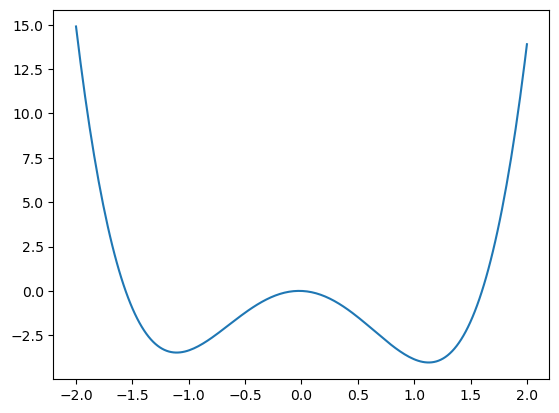

In [15]:
plt.plot(serie_x._value, serie_Vx._value)
plt.show()

### Función de partición

In [16]:
Kb = unit.constants.BOLTZMANN_CONSTANT_kB * unit.constants.AVOGADRO_CONSTANT_NA

In [17]:
Kb = Kb.in_units_of(unit.kilocalories_per_mole/unit.kelvin)

In [24]:
def z(x):
    beta = 1.0/(Kb*T)
    return np.exp(- beta * (Eo*(C*x**4-x**2) + M*x))

In [25]:
serie_zx = []

In [26]:
for aux in serie_x:
    serie_zx.append(z(aux))

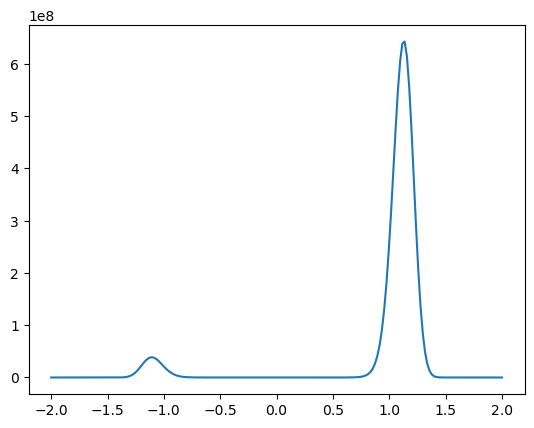

In [27]:
plt.plot(serie_x._value, serie_zx)
plt.show()

In [ ]:
Z = np.sum(serie_zx)

In [ ]:
Z

In [ ]:
serie_Px = serie_zx/Z

In [ ]:
plt.plot(serie_x._value, serie_Px)
plt.show()

## Vamos a hacer un experimento para ver si es verdad...

## Creamos el sistema

In [ ]:
system = mm.System()

In [ ]:
system.addParticle(39.948 * unit.amu) # masa del átomo de argón

In [ ]:
system.getNumParticles()

# Añadimos el potencial externo

In [ ]:
#force = mm.CustomExternalForce('(K/2.0) * (x^2 + y^2 + z^2)')

force = mm.CustomExternalForce('Eo*(C*x**4-x**2) + M*x + (K/2.0)*(y**2+z**2)')

In [ ]:
force.addGlobalParameter('Eo', 6.0* unit.kilocalories_per_mole/unit.angstrom**2)
force.addGlobalParameter('C', 0.4* 1/unit.angstrom**2)
force.addGlobalParameter('M', -0.25 * unit.kilocalories_per_mole/unit.angstrom)
force.addGlobalParameter('K',  10.0 * unit.kilocalories_per_mole/unit.angstrom**2)

In [ ]:
force.addParticle(0)

In [ ]:
system.addForce(force)

## Estado termodinámico

In [ ]:
# Formalismo NVT
temperature = 100.0*unit.kelvin
pressure    = None

## Parametros de la simulación

In [ ]:
integration_timestep = 2.0*unit.femtoseconds
saving_timestep = 0.01*unit.picoseconds
simulation_time = 500.0*unit.picoseconds

saving_steps = int(saving_timestep/integration_timestep)
num_saving_steps = int(simulation_time/saving_timestep)

## Integrador

In [ ]:
friction   = 20.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

## Plataforma

In [ ]:
platform = mm.Platform.getPlatformByName('CUDA')

## Reporteros

In [ ]:
times = np.zeros(num_saving_steps, np.float32) * unit.picoseconds
positions  = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms
velocities = np.zeros([num_saving_steps,3], np.float32) * unit.angstroms/unit.picosecond
potential_energies   = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole
kinetic_energies     = np.zeros([num_saving_steps], np.float32) * unit.kilocalories_per_mole

## Condiciones iniciales

In [ ]:
initial_positions  = [[0.0, 0.0, 0.0]] * unit.angstroms

## Creamos el contexto

In [ ]:
context = mm.Context(system, integrator, platform)

In [ ]:
context.setPositions(initial_positions)

In [ ]:
#context.setVelocitiesToTemperature(temperature)

## Llenamos los reporteros para el paso 0

In [ ]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)

In [ ]:
times[0] =  state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

## Corriendo la simulación

In [ ]:
for ii in range(num_saving_steps):
    context.getIntegrator().step(saving_steps)
    state_xx = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state_xx.getTime()
    positions[ii] = state_xx.getPositions()[0]
    velocities[ii] = state_xx.getVelocities()[0]
    kinetic_energies[ii]=state_xx.getKineticEnergy()
    potential_energies[ii]=state_xx.getPotentialEnergy()
    #print('Paso',ii,'con tiempo', state_xx.getTime())

## Representamos los datos de la simulación

### Trayectoria

In [ ]:
plt.plot(positions[:,0], label='X')
plt.legend()
plt.show()

In [ ]:
serie_x.shape

In [ ]:
frecuencias = np.zeros((199))

In [ ]:
delta = (serie_x[1]-serie_x[0])

In [ ]:
for x in positions[:,0]:
    indice_cajon = int((x-serie_x[0])/delta)
    frecuencias[indice_cajon] += 1

In [ ]:
frecuencias

In [ ]:
probabilidades_observadas = frecuencias / np.sum(frecuencias)

In [ ]:
densidad_probabilidades_observadas = probabilidades_observadas

In [ ]:
plt.plot((serie_x[1:]+serie_x[0:-1])/2.0, densidad_probabilidades_observadas)
plt.plot(serie_x._value, serie_Px)
plt.show()

- Qué pasa si hago el experimento a distintas fricciones?